## 4.10.3 project work_compare and visualize
### This script contains the following points:

#### 1. Import data/libraries/additional setups
#### 2. Create visualization to show the distribution of customer profiles
#### 3. Compare customer profiles with region and distribution (crosstabs)
#### 4. Produce charts to illustrate customer profiles vs region and departments
---------------------------------------------------------------------------------------------------------------------------

#### 1. Import data/libraries/additional setups

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from matplotlib.ticker import ScalarFormatter, FuncFormatter
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Set project folder path directory
path = r"03-11-23 Instacart Basket Analysis"

In [3]:
# Read full dataframe from pickle file into dataframe 'df'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Read customer profile dataframe from pickle file into dataframe 'cust_pro_df'
full_freq_exp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_freq_exp.pkl'))

In [5]:
# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
# Create pd setting, (display max columns 100, and max rows 100)
pd.set_option('display.max_rows', 100, 'display.max_columns', 100,)

In [7]:
# Consistency checks
df.shape, full_freq_exp.shape

((24414877, 43), (4495001, 6))

In [8]:
df

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_orders,freq_flag,first_name,last_name,gender,state,age,date_joined,dependants,fam_status,income,region,low_activity,department,goods_value,goods_prof,age_prof,income_range,depend_stat,shops_on,day_period,cust_prof
0,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.37,Low spender,20.50,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,beverages,high-value,entertainers & socializers,young adult,low-med,has dependants,weekdays,afternoon,married/young adult/parent/gaurdian
1,3367565,1,6,2,7,19.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.50,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,beverages,high-value,entertainers & socializers,young adult,low-med,has dependants,weekdays,morning,married/young adult/parent/gaurdian
2,550135,1,7,1,9,20.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.37,Low spender,20.50,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,beverages,high-value,entertainers & socializers,young adult,low-med,has dependants,weekends,morning,married/young adult/parent/gaurdian
3,3108588,1,8,1,14,14.00,196,2,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.37,Low spender,20.50,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,beverages,high-value,entertainers & socializers,young adult,low-med,has dependants,weekends,afternoon,married/young adult/parent/gaurdian
4,2295261,1,9,1,16,0.00,196,4,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.37,Low spender,20.50,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,beverages,high-value,entertainers & socializers,young adult,low-med,has dependants,weekends,afternoon,married/young adult/parent/gaurdian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24414872,391936,58201,23,3,0,24.00,5161,1,0,Dried Mango,18,10,6.10,Mid-range product,Regularly busy,Slowest days,Average orders,28,Regular customer,7.69,Low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active customer,bulk,low-value,meal planners,senior,high,has dependants,weekdays,late-night/early-morning,married/senior/parent/gaurdian
24414873,525976,58201,24,6,16,3.00,5161,1,1,Dried Mango,18,10,6.10,Mid-range product,Regularly busy,Regularly busy,Most orders,28,Regular customer,7.69,Low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active customer,bulk,low-value,meal planners,senior,high,has dependants,weekdays,afternoon,married/senior/parent/gaurdian
24414874,758290,58201,26,0,12,9.00,5161,1,1,Dried Mango,18,10,6.10,Mid-range product,Busiest day,Busiest days,Most orders,28,Regular customer,7.69,Low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active customer,bulk,low-value,meal planners,senior,high,has dependants,weekends,afternoon,married/senior/parent/gaurdian
24414875,460711,58201,27,6,9,13.00,5161,1,1,Dried Mango,18,10,6.10,Mid-range product,Regularly busy,Regularly busy,Most orders,28,Regular customer,7.69,Low spender,13.00,Regular customer,Todd,Khan,Male,Florida,75,2/8/2019,2,married,138066,South,Active customer,bulk,low-value,meal planners,senior,high,has dependants,

In [9]:
full_freq_exp

order_number  \
                                                                                                                                                     max   
user_id cust_prof                           income_range region    department goods_value goods_prof                 shops_on day_period                   
1       married/young adult/parent/gaurdian low-med      South     beverages  high-value  entertainers & socializers weekdays afternoon                5   
                                                                                                                              morning                 10   
                                                                                                                     weekends afternoon                9   
                                                                                                                              morning                  7   
                                                                   breakfast  reg-value   meal planners              weekdays morning                 10   
...                                                                                                                                                  ...   
99999   married/middle-aged/parent/gaurdian med-high     Northeast snacks     high-value  snackers                   weekdays evening/night           30   
                                                                                                                              morning                 33   
                                                                                                                     weekends afternoon               34   
                                                                                                                              evening/night           23   
                                                                                                                              morning                 27   

                                                                                                                                                   \
                                                                                                                                             mean   
user_id cust_prof                           income_range region    department goods_value goods_prof                 shops_on day_period            
1       married/young adult/parent/gaurdian low-med      South     beverages  high-value  entertainers & socializers weekdays afternoon      5.00   
                                                                                                                              morning        8.67   
                                                                                                                     weekends afternoon      8.50   
                                                                                                                              morning        7.00   
                                                                   breakfast  reg-value   meal planners              weekdays morning       10.00   
...                                                                                                                                           ...   
99999   married/middle-aged/parent/gaurdian med-high     Northeast snacks     high-value  snackers                   weekdays evening/night 25.00   
                                                                                                                              morning       30.50   
                                                                                                                     weekends afternoon     21.09   
                                                                                                                              evening/night 23.00   
                  

---------------------------------------------------------------------------------------------------------------------------

#### 2. Create a visualization to show the distribution of customer profiles

In [10]:
# Print 'df' columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_orders', 'freq_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'dependants', 'fam_status', 'income', 'region', 'low_activity',
       'department', 'goods_value', 'goods_prof', 'age_prof', 'income_range',
       'depend_stat', 'shops_on', 'day_period', 'cust_prof'],
      dtype='object')

In [11]:
# Create subset for profile variables, Overwrite dataframe {df:df}
cust_subset = ['order_id', 'user_id', 'order_number',
               'product_name','prices', 'price_range_loc',
               'busiest_days', 'busiest_period_of_day', 'loyalty_flag',
               'avg_price', 'spending_flag', 'freq_flag',
               'gender','cust_prof', 'income',
               'income_range','region', 'department',
               'goods_value', 'goods_prof', 'age_prof',
               'shops_on', 'day_period',
              ]

In [12]:
# Print new 'df' dataframe
cust_subset

['order_id',
 'user_id',
 'order_number',
 'product_name',
 'prices',
 'price_range_loc',
 'busiest_days',
 'busiest_period_of_day',
 'loyalty_flag',
 'avg_price',
 'spending_flag',
 'freq_flag',
 'gender',
 'cust_prof',
 'income',
 'income_range',
 'region',
 'department',
 'goods_value',
 'goods_prof',
 'age_prof',
 'shops_on',
 'day_period']

In [13]:
cust_pro_df = df[cust_subset]

In [14]:
cust_pro_df

,order_id,user_id,order_number,product_name,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,avg_price,spending_flag,freq_flag,gender,cust_prof,income,income_range,region,department,goods_value,goods_prof,age_prof,shops_on,day_period
0,431534,1,5,Soda,9.00,Mid-range product,Slowest days,Most orders,New customer,6.37,Low spender,Frequent customer,Female,married/young adult/parent/gaurdian,40423,low-med,South,beverages,high-value,entertainers & socializers,young adult,weekdays,afternoon
1,3367565,1,6,Soda,9.00,Mid-range product,Regularly busy,Average orders,New customer,6.37,Low spender,Frequent customer,Female,married/young adult/parent/gaurdian,40423,low-med,South,beverages,high-value,entertainers & socializers,young adult,weekdays,morning
2,550135,1,7,Soda,9.00,Mid-range product,Busiest days,Most orders,New customer,6.37,Low spender,Frequent customer,Female,married/young adult/parent/gaurdian,40423,low-med,South,beverages,high-value,entertainers & socializers,young adult,weekends,morning
3,3108588,1,8,Soda,9.00,Mid-range product,Busiest days,Most orders,New customer,6.37,Low spender,Frequent customer,Female,married/young adult/parent/gaurdian,40423,low-med,South,beverages,high-value,entertainers & socializers,young adult,weekends,afternoon
4,2295261,1,9,Soda,9.00,Mid-range product,Busiest days,Most orders,New customer,6.37,Low spender,Frequent customer,Female,married/young adult/parent/gaurdian,40423,low-med,South,beverages,high-value,entertainers & socializers,young adult,weekends,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24414872,391936,58201,23,Dried Mango,6.10,Mid-range product,Slowest days,Average orders,Regular customer,7.69,Low spender,Regular customer,Male,married/senior/parent/gaurdian,138066,high,South,bulk,low-value,meal planners,senior,weekdays,late-night/early-morning
24414873,525976,58201,24,Dried Mango,6.10,Mid-range product,Regularly busy,Most orders,Regular customer,7.69,Low spender,Regular customer,Male,married/senior/parent/gaurdian,138066,high,South,bulk,low-value,meal planners,senior,weekdays,afternoon
24414874,758290,58201,26,Dried Mango,6.10,Mid-range product,Busiest days,Most orders,Regular customer,7.69,Low spender,Regular customer,Male,married/senior/parent/gaurdian,138066,high,South,bulk,low-value,meal planners,senior,weekends,afternoon
24414875,460711,58201,27,Dried Mango,6.10,Mid-range product,Regularly busy,Most orders,Regular customer,7.69,Low spender,Regular customer,Male,married/senior/parent/gaurdian,138066,high,South,bulk,low-value,meal planners,senior,weekdays,morning


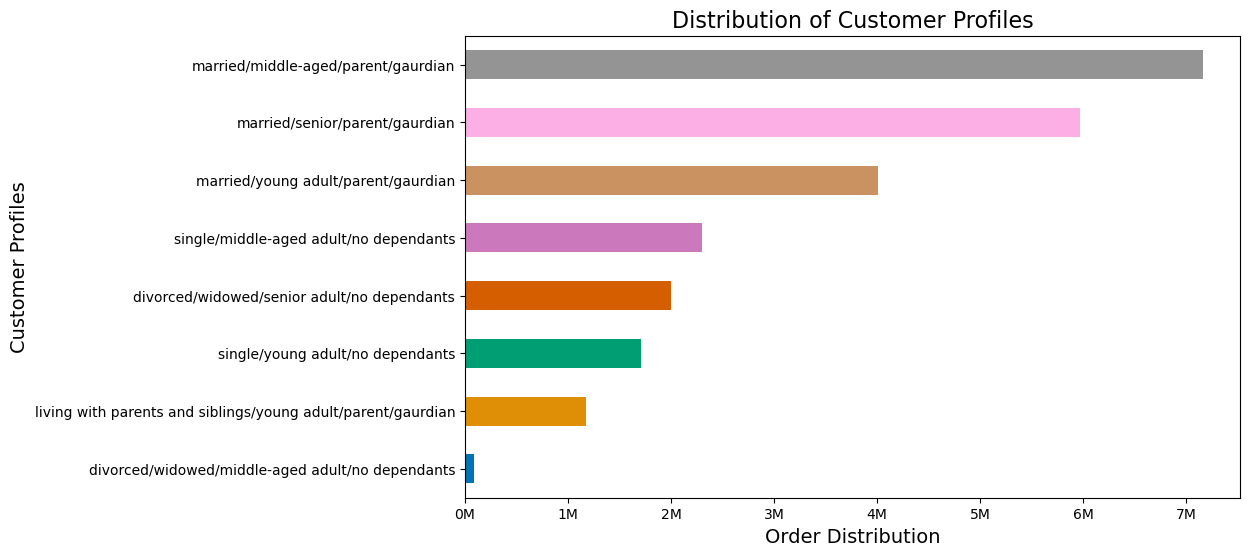

In [15]:
# Create a distribution bar chart for (customer profile)


# Set fig size
plt.figure(figsize=(10, 6))

# Use sns colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Create a bar chart with the colorblind-friendly palette
dist = cust_pro_df['cust_prof'].value_counts().sort_values(ascending=True).plot.barh(color=colors)

# Add titles and labels
plt.title('Distribution of Customer Profiles', fontsize=16)
plt.xlabel('Order Distribution', fontsize=14)
plt.ylabel('Customer Profiles', fontsize=14)

# Format y-axis labels in millions
dist.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Save the chart as an image file
dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_cust_prof.png'), bbox_inches='tight')

# Show the plot
#plt.tight_layout()
plt.show()

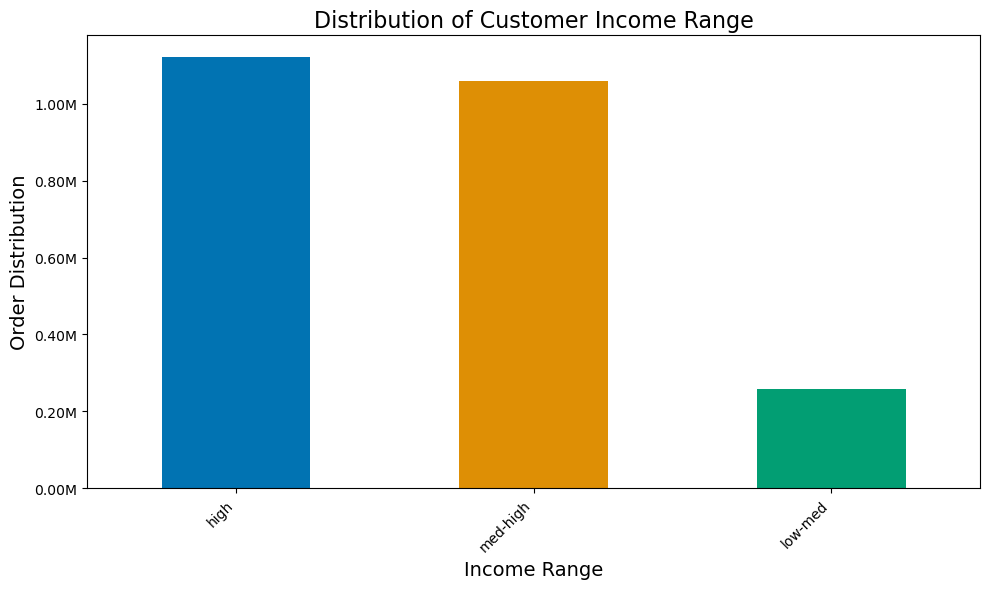

In [16]:
# Create a distribution bar chart for (income range)


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart with specified colors
dist2 = cust_pro_df['income_range'].value_counts().plot.bar(color=colors)

# Add titles and labels
plt.title('Distribution of Customer Income Range', fontsize=16)
plt.xlabel('Income Range', fontsize=14)
plt.ylabel('Order Distribution', fontsize=14)

# Improve readability by rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels in millions
dist2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}M'.format(x / 1e7)))

# Save the chart as an image file
dist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_income_range.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

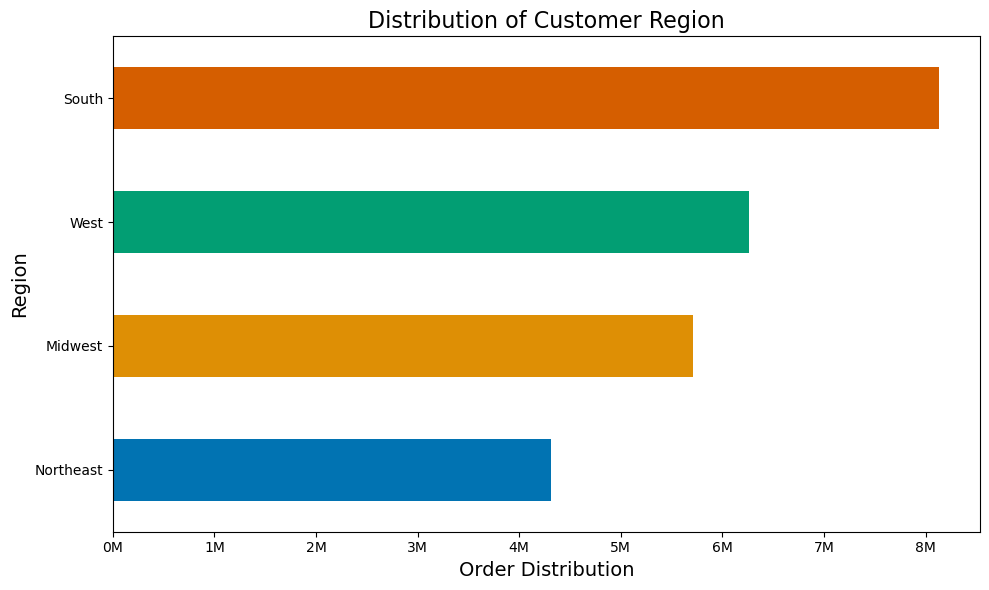

In [17]:
# Create a distribution bar chart for (region)


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart with specified colors
dist3 = cust_pro_df['region'].value_counts().sort_values(ascending=True).plot.barh(color=colors)

# Add titles and labels
plt.title('Distribution of Customer Region', fontsize=16)
plt.xlabel('Order Distribution', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Format y-axis labels in millions
dist3.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Save the chart as an image file
dist3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_region.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

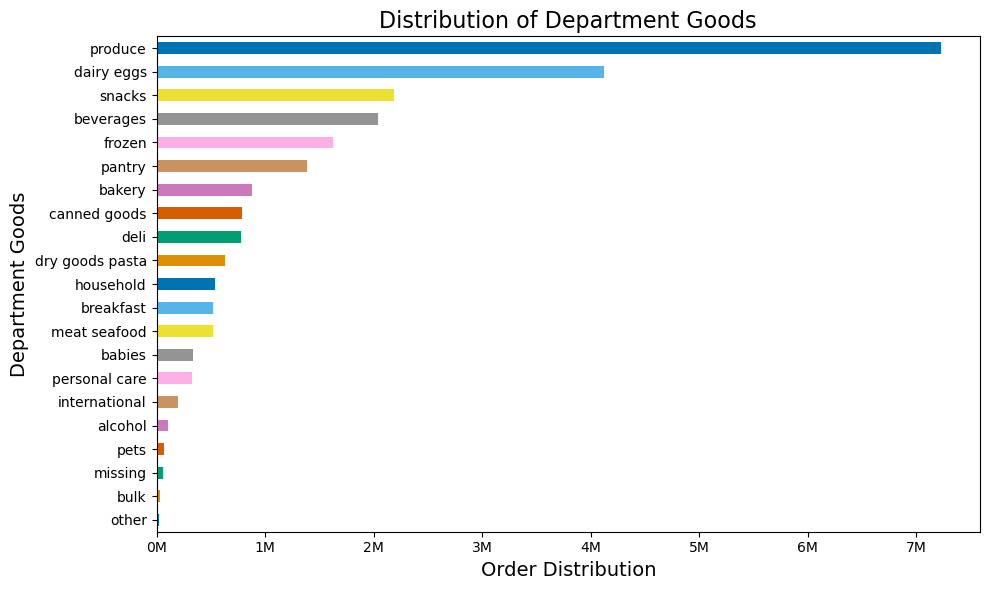

In [18]:
# Create a distribution bar chart for (department)


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart with specified colors
dist4 = cust_pro_df['department'].value_counts().sort_values(ascending=True).plot.barh(color=colors)

# Add titles and labels
plt.title('Distribution of Department Goods', fontsize=16)
plt.xlabel('Order Distribution', fontsize=14)
plt.ylabel('Department Goods', fontsize=14)

# Format y-axis labels in millions
dist4.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Save the chart as an image file
dist4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_department.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

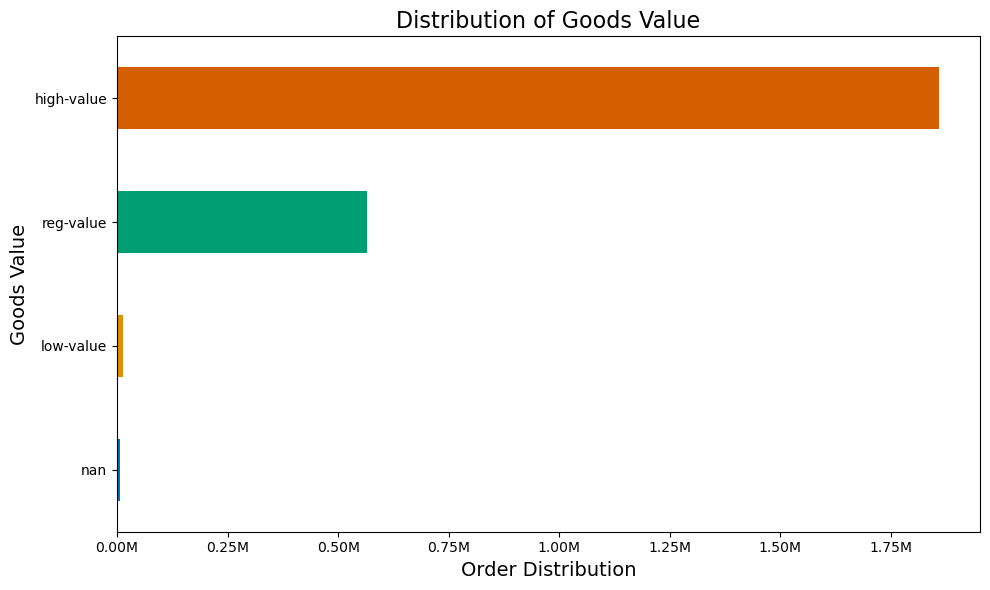

In [19]:
# Create a distribution bar chart for (goods value)


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart with specified colors
dist5 = cust_pro_df['goods_value'].value_counts().sort_values(ascending=True).plot.barh(color=colors)

# Add titles and labels
plt.title('Distribution of Goods Value', fontsize=16)
plt.xlabel('Order Distribution', fontsize=14)
plt.ylabel('Goods Value', fontsize=14)

# Format y-axis labels in millions
dist5.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}M'.format(x / 1e7)))

# Save the chart as an image file
dist5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_goods_value.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

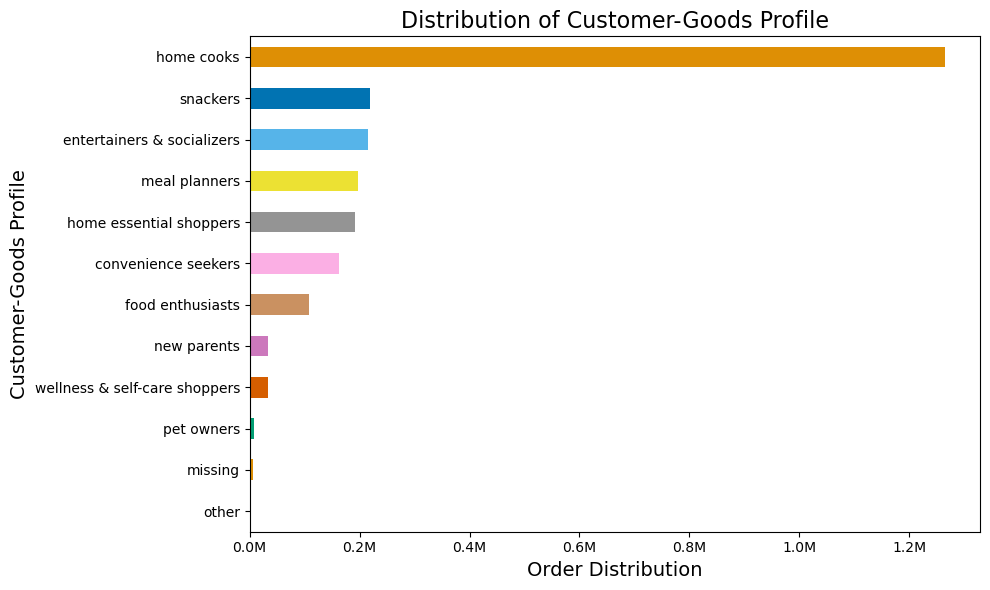

In [20]:
# Create a distribution bar chart for (goods profile)


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart with specified colors
dist6 = cust_pro_df['goods_prof'].value_counts().sort_values(ascending=True).plot.barh(color=colors)

# Add titles and labels
plt.title('Distribution of Customer-Goods Profile', fontsize=16)
plt.xlabel('Order Distribution', fontsize=14)
plt.ylabel('Customer-Goods Profile', fontsize=14)

# Format y-axis labels in millions
dist6.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1e7)))

# Save the chart as an image file
dist6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_goods_prof.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

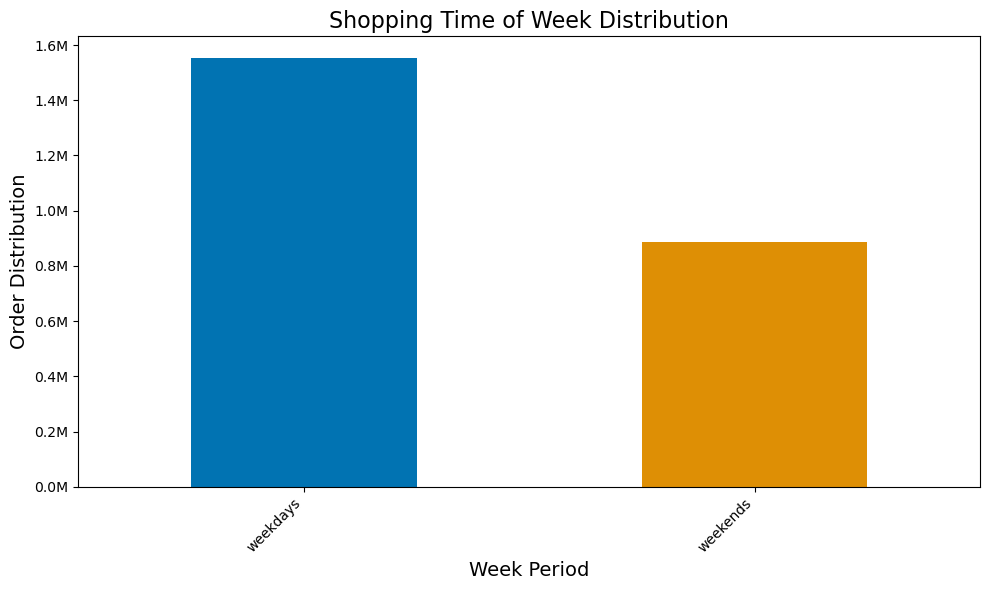

In [21]:
# Create a distribution bar chart for (shops on day of)


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart with specified colors
dist7 = cust_pro_df['shops_on'].value_counts().plot.bar(color=colors)

# Add titles and labels
plt.title('Shopping Time of Week Distribution', fontsize=16)
plt.xlabel('Week Period', fontsize=14)
plt.ylabel('Order Distribution', fontsize=14)

# Improve readability by rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels in millions
dist7.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1e7)))

# Save the chart as an image file
dist7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_shops_on.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

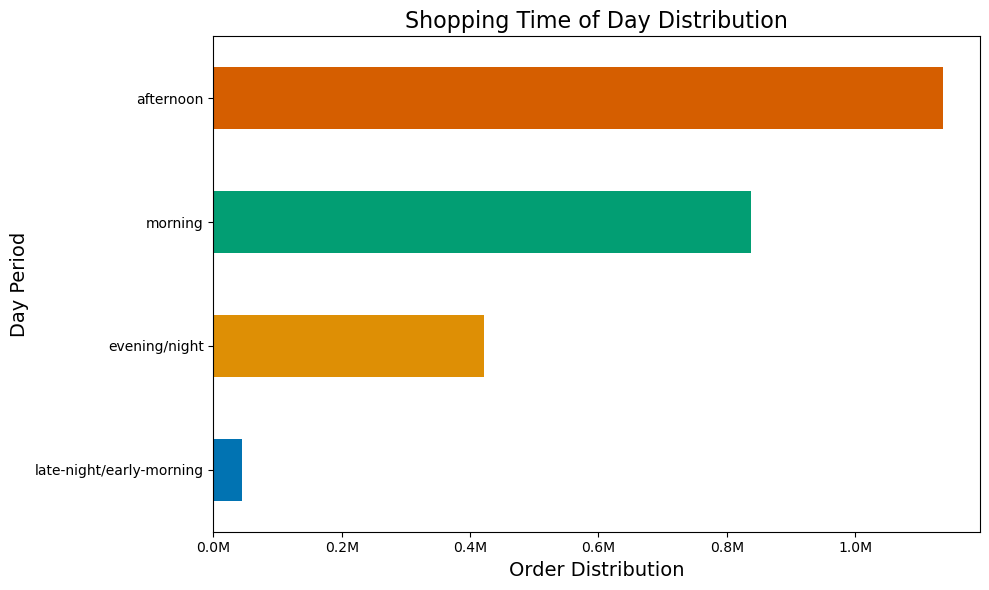

In [22]:
# Create a distribution bar chart for (orders on day period)


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart with specified colors
dist8 = cust_pro_df['day_period'].value_counts().sort_values(ascending=True).plot.barh(color=colors)

# Add titles and labels
plt.title('Shopping Time of Day Distribution', fontsize=16)
plt.xlabel('Order Distribution', fontsize=14)
plt.ylabel('Day Period', fontsize=14)

# Format y-axis labels in millions
dist8.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1e7)))

# Save the chart as an image file
dist8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_chart_day_period.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------------------

#### 3. Compare customer profiles with region and distribution (crosstabs)

In [23]:
# Compare all customer profiles with region and departments
crosstab_1 = pd.crosstab(cust_pro_df['region'], cust_pro_df['department'], dropna=False)

crosstab_1.to_clipboard()

In [24]:
# Compare customer profiles with region and departments
crosstab = pd.crosstab(cust_pro_df['cust_prof'], [cust_pro_df['region'], cust_pro_df['department']], dropna=False)

crosstab.to_clipboard()

In [25]:
# Compare customer profiles with region and departments
crosstab_2 = pd.crosstab(cust_pro_df['income_range'], [cust_pro_df['region'], cust_pro_df['department']], dropna=False)

crosstab_2.to_clipboard()

In [26]:
# Compare customer profiles with region and departments
crosstab_3 = pd.crosstab(cust_pro_df['goods_value'], [cust_pro_df['region'], cust_pro_df['department']], dropna=False)

crosstab_3.to_clipboard()

In [27]:
# Compare customer profiles with region and departments
crosstab_4 = pd.crosstab(cust_pro_df['goods_prof'], [cust_pro_df['region'], cust_pro_df['department']], dropna=False)

crosstab_4.to_clipboard()

In [28]:
# Compare customer profiles with region and departments
crosstab_5 = pd.crosstab(cust_pro_df['shops_on'], [cust_pro_df['region'], cust_pro_df['department']], dropna=False)

crosstab_5.to_clipboard()

In [29]:
# Compare customer profiles with region and departments
crosstab_6 = pd.crosstab(cust_pro_df['day_period'], [cust_pro_df['region'], cust_pro_df['department']], dropna=False)

crosstab_6.to_clipboard()

---------------------------------------------------------------------------------------------------------------------------

#### 4. Produce charts to illustrate customer profiles vs region and departments

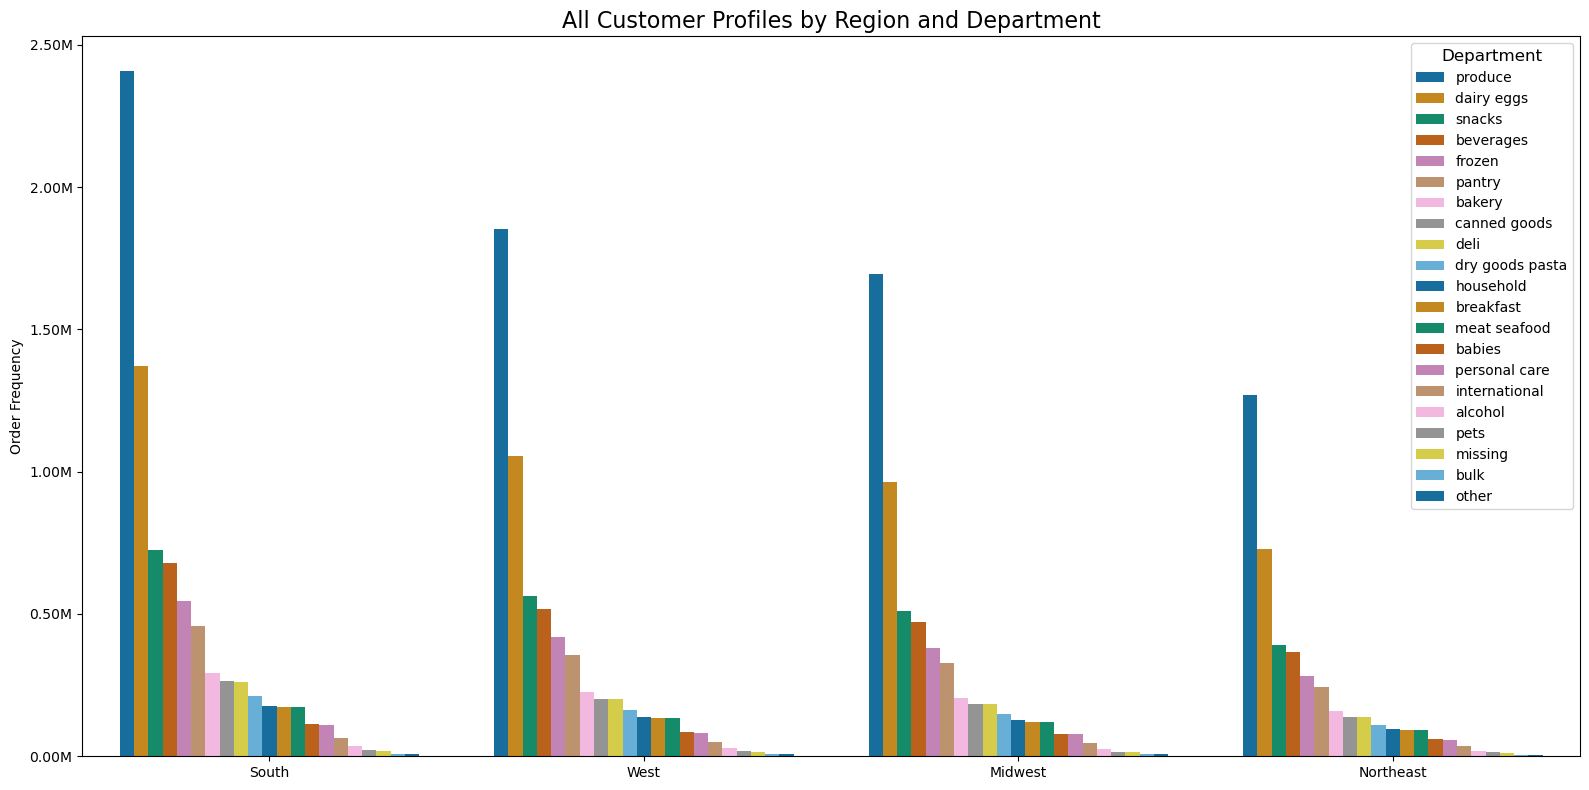

In [30]:
# Create a stacked bar chart for all customer profiles across regions


# Get the order of regions by count
region_order = cust_pro_df['region'].value_counts().index

# Get the order of departments by count
department_order = cust_pro_df['department'].value_counts().index

# Set fig size
plt.figure(figsize=(16, 8))

# Stacked bar chart for counts
countplt = sns.countplot(x='region', hue='department', data=cust_pro_df, palette='colorblind', dodge=True, order=region_order, hue_order=department_order)

plt.title('All Customer Profiles by Region and Department', fontsize=16)
plt.xlabel('')
plt.ylabel('Order Frequency')

# Add a legend for 'department'
plt.legend(title='Department', title_fontsize='12')

# Format y-axis labels in millions
countplt.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}M'.format(x / 1e6)))

# Save the chart as an image file
countplt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_region_dep.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

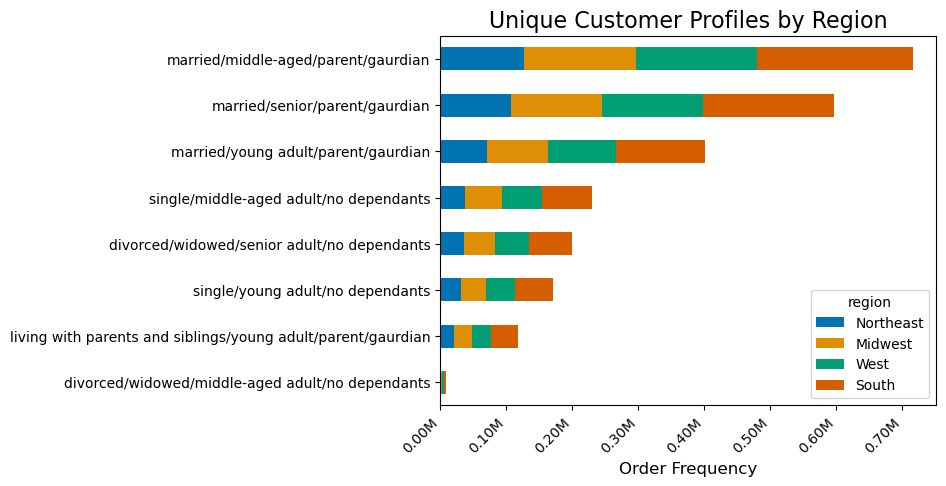

In [31]:
# Create a stacked bar chart for customer profiles by region


# Set figsize
plt.figure(figsize=(10, 6))

# Use sns color palette for better aesthetics
colors = sns.color_palette('colorblind', n_colors=len(cust_pro_df['region'].unique()))

# Create a horizontal stacked bar chart with sorted values
cust_grp = cust_pro_df.groupby(['cust_prof', 'region']).size().unstack()

# Sort values within each 'department' category
cust_grp = cust_grp.apply(lambda x: x.sort_values(ascending=True), axis=1)

# Sort values of each 'department' category based on the sum of values across 'cust_prof'
cust_grp = cust_grp.loc[cust_grp.sum(axis=1).sort_values(ascending=True).index]

# Plot the horizontal stacked bar chart
stack2 = cust_grp.plot.barh(stacked=True, color=colors)

# Add titles and labels
plt.title('Unique Customer Profiles by Region', fontsize=16)
plt.xlabel('Order Frequency', fontsize=12)
plt.ylabel('')

# Improve readability by rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels in millions
stack2.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}M'.format(x / 1e7)))

# Save the chart as an image file
stack2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_cust_prof_byregion.png'), bbox_inches='tight')

# Adjust layout for better spacing
# plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

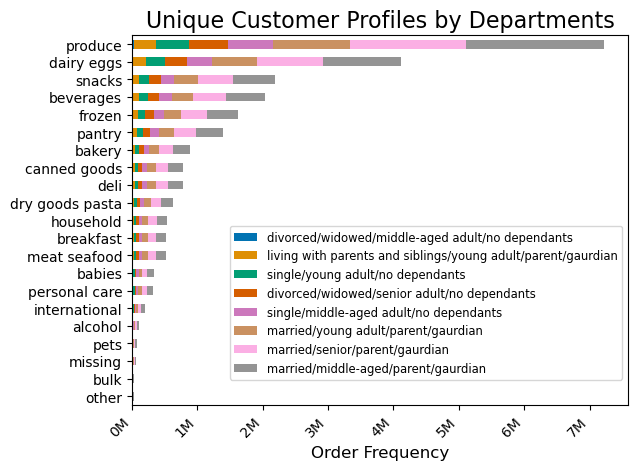

In [32]:
# Create a stacked bar chart for customer profiles by departments


# Set fig size
plt.figure(figsize=(12, 6))

# Use sns color palette for better aesthetics
colors = sns.color_palette('colorblind', n_colors=len(cust_pro_df['cust_prof'].unique()))

# Create a horizontal stacked bar chart with sorted values
cust_grp_dept = cust_pro_df.groupby(['department', 'cust_prof']).size().unstack()

# Sort values within each 'department' category
cust_grp_dept = cust_grp_dept.apply(lambda x: x.sort_values(ascending=True), axis=1)

# Sort values of each 'department' category based on the sum of values across 'cust_prof'
cust_grp_dept = cust_grp_dept.loc[cust_grp_dept.sum(axis=1).sort_values(ascending=True).index]

# Plot the horizontal stacked bar chart
stack3 = cust_grp_dept.plot.barh(stacked=True, color=colors)

# Add titles and labels
plt.title('Unique Customer Profiles by Departments', fontsize=16)
plt.xlabel('Order Frequency', fontsize=12)
plt.ylabel('')  # Empty string to remove y-axis label

# Make the legend smaller
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.5), fontsize='small')

# Improve readability by rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels in millions
stack3.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Save the chart as an image file
stack3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_cust_bydept.png'), bbox_inches='tight')

# Adjust layout for better spacing
# plt.tight_layout()

# Show the plot
plt.show()

---------------------------------------------------------------------------------------------------------------------------

<Figure size 1000x600 with 0 Axes>

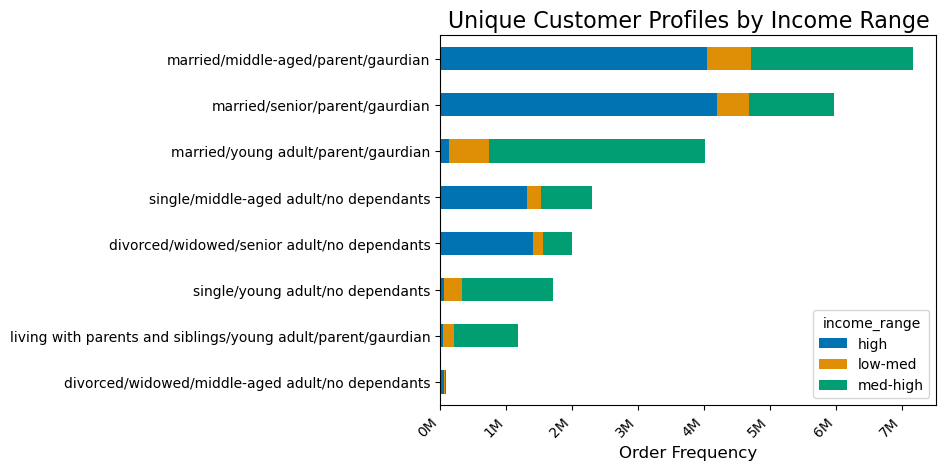

In [33]:
# Create a stacked bar chart for customer profiles by income range


# Set figsize
plt.figure(figsize=(10, 6))

# Use sns color palette for better aesthetics
colors = sns.color_palette('colorblind', n_colors=len(cust_pro_df['cust_prof'].unique()))

# Create a stacked bar chart with sorted values
income_cust_prof = cust_pro_df.groupby(['cust_prof', 'income_range']).size().unstack()

# Sort values within each 'income_range' category in descending order
income_cust_prof = income_cust_prof.apply(lambda y: y.sort_values(ascending=True), axis=1)

# Sort values of each 'income_range' category based on the sum of values across 'cust_prof'
income_cust_prof = income_cust_prof.loc[income_cust_prof.sum(axis=1).sort_values(ascending=True).index]

# Plot the stacked bar chart
stack4 = income_cust_prof.plot.barh(stacked=True, color=colors)

# Add titles and labels
plt.title('Unique Customer Profiles by Income Range', fontsize=16)
plt.xlabel('Order Frequency', fontsize=12)
plt.ylabel('')

# Improve readability by rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels in millions
stack4.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Save the chart as an image file
stack4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_income_range.png'), bbox_inches='tight')

# Show the plot
# plt.tight_layout()
plt.show()

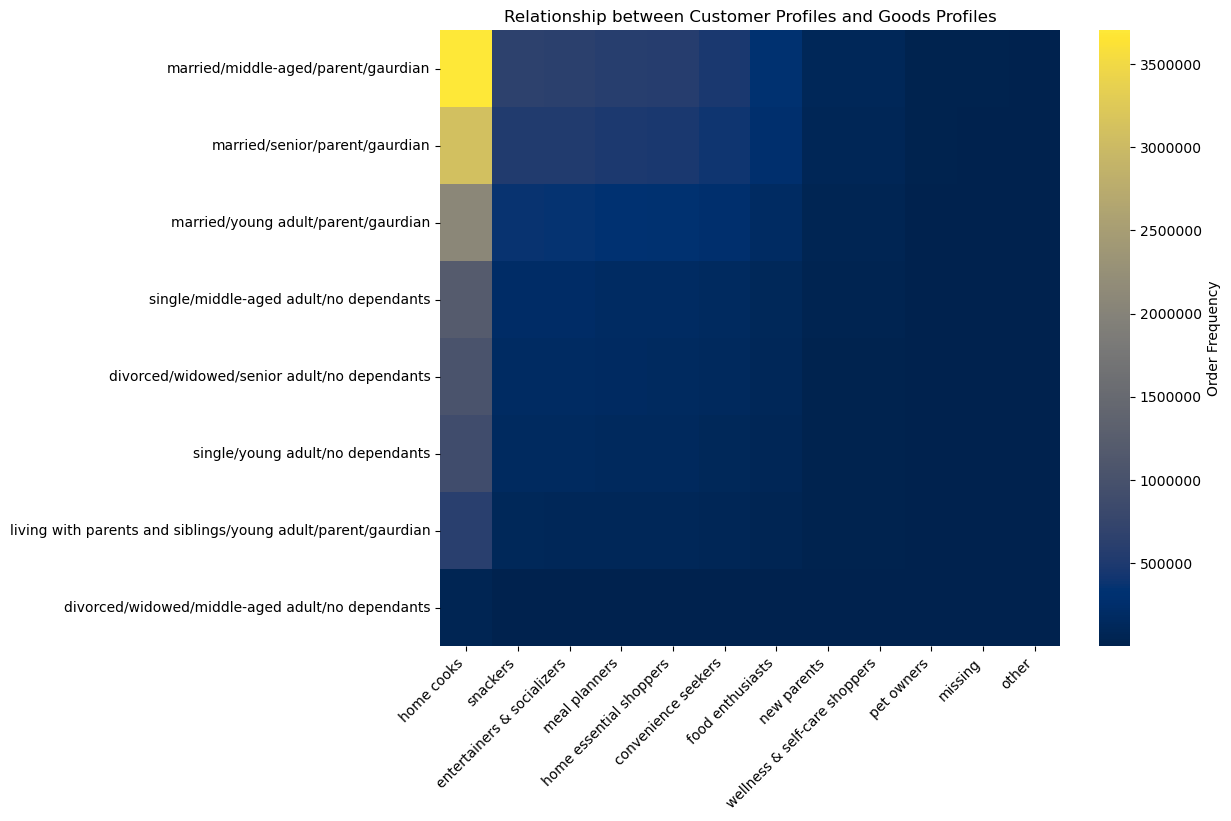

In [34]:
# Create a heatmap showing the relationship between customer profiles and department goods profiles


# Create a pivot table for the heatmap
heatmap_data = cust_pro_df.groupby(['cust_prof', 'goods_prof']).size().unstack()

# Sort both the x and y axes based on the count of occurrences
heatmap_data = heatmap_data.sum(axis=1).sort_values(ascending=False)
heatmap_data = heatmap_data.index.to_list()
heatmap_data = cust_pro_df.groupby(['cust_prof', 'goods_prof']).size().unstack().loc[heatmap_data]
heatmap_data = heatmap_data[heatmap_data.sum().sort_values(ascending=False).index]

# Create the heatmap
plt.figure(figsize=(10, 8))
heat = sns.heatmap(heatmap_data, cmap='cividis', annot=False, cbar_kws={'label': 'Order Frequency', 'format': '%.0f'})

# Rotate x-axis category labels for better readability
plt.xticks(rotation=45, ha='right')

# Set axis labels and plot title
plt.xlabel('')
plt.ylabel('')
plt.title('Relationship between Customer Profiles and Goods Profiles')

# Save the chart as an image file
heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_cust_pro_goods_prof.png'), bbox_inches='tight')

# Show the plot
plt.show()

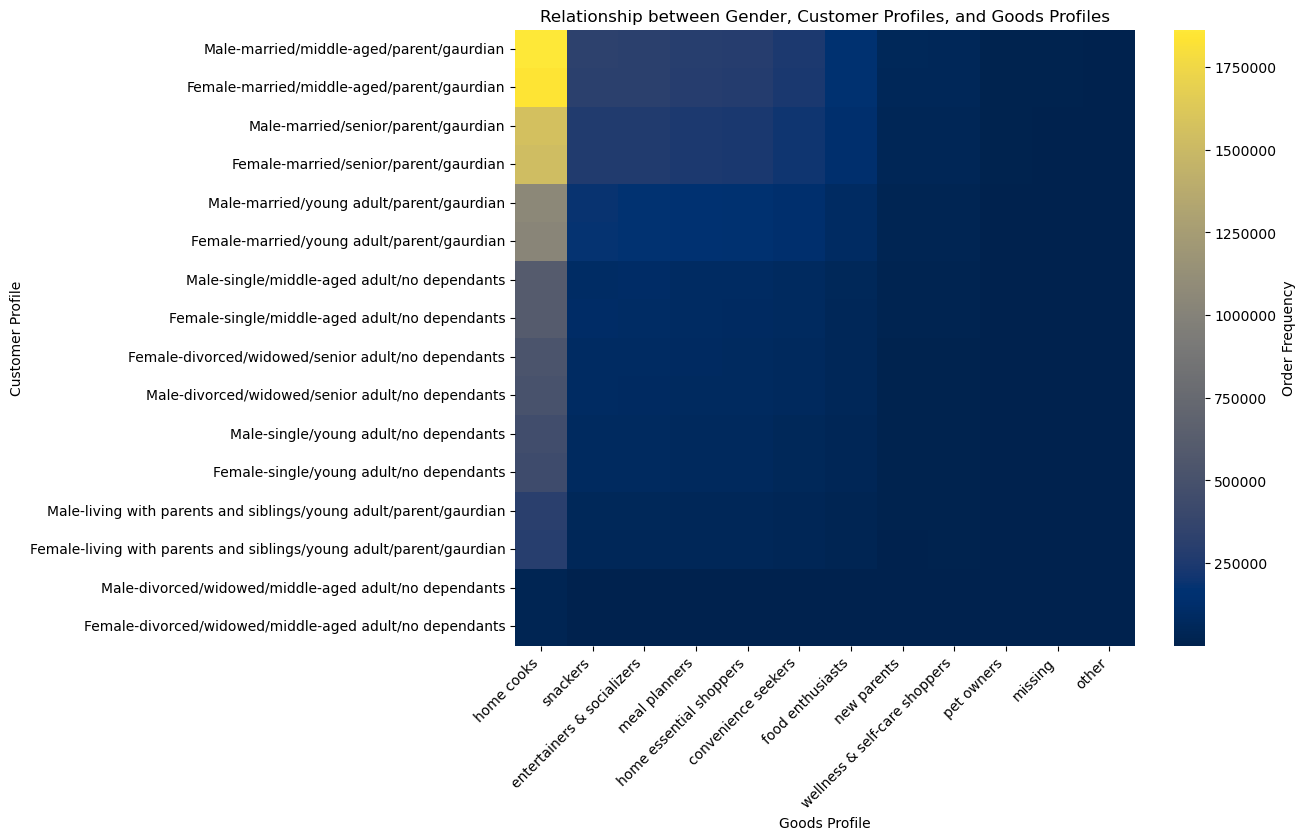

In [35]:
# Create a heatmap showing the relationship between customer profiles and department income ranges (1)


# Create a pivot table for the heatmap and sort values based on the count of occurrences
heatmap_data_2 = cust_pro_df.groupby(['gender', 'cust_prof', 'goods_prof']).size().unstack()

# Sort both the x and y axes based on the count of occurrences
heatmap_data_2 = heatmap_data_2.sum(axis=1).sort_values(ascending=False)
heatmap_data_2 = heatmap_data_2.index.to_list()
heatmap_data_2 = cust_pro_df.groupby(['gender', 'cust_prof', 'goods_prof']).size().unstack().loc[heatmap_data_2]
heatmap_data_2 = heatmap_data_2[heatmap_data_2.sum().sort_values(ascending=False).index]

# Create the heatmap
plt.figure(figsize=(10, 8))
heat2 = sns.heatmap(heatmap_data_2, cmap='cividis', annot=False, cbar_kws={'label': 'Order Frequency', 'format': '%.0f'})

# Rotate x-axis category labels for better readability
plt.xticks(rotation=45, ha='right')

# Set axis labels and plot title
plt.xlabel('Goods Profile')
plt.ylabel('Customer Profile')
plt.title('Relationship between Gender, Customer Profiles, and Goods Profiles')

# Save the chart as an image file
heat2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_cust_pro_goods_prof_count.png'), bbox_inches='tight')

# Show the plot
plt.show()

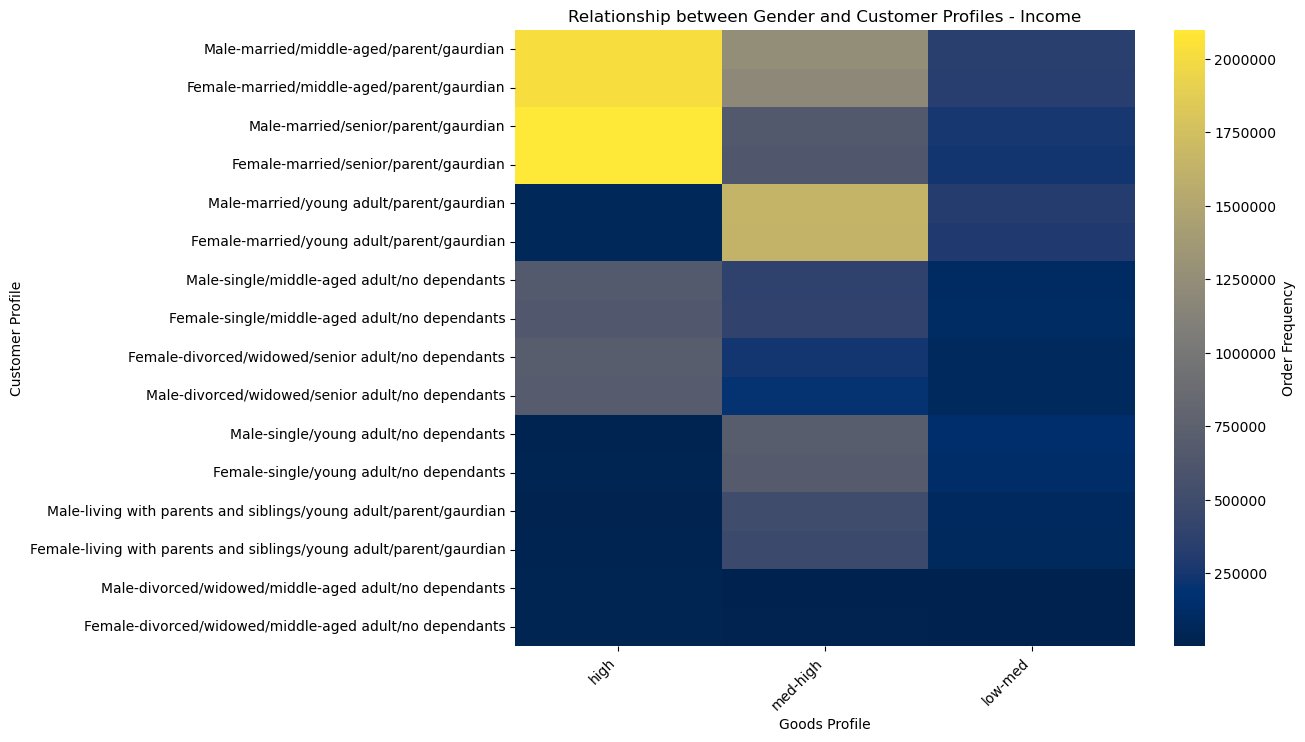

In [36]:
# Create a heatmap showing the relationship between customer profiles and department income ranges


# Create a pivot table for the heatmap
heatmap_data_3 = cust_pro_df.groupby(['gender', 'cust_prof', 'income_range']).size().unstack()

# Sort both the x and y axes based on the count of occurrences
heatmap_data_3 = heatmap_data_3.sum(axis=1).sort_values(ascending=False)
heatmap_data_3 = heatmap_data_3.index.to_list()
heatmap_data_3 = cust_pro_df.groupby(['gender', 'cust_prof', 'income_range']).size().unstack().loc[heatmap_data_3]
heatmap_data_3 = heatmap_data_3[heatmap_data_3.sum().sort_values(ascending=False).index]

# Create the heatmap
plt.figure(figsize=(10, 8))
heat3 = sns.heatmap(heatmap_data_3, cmap='cividis', annot=False, cbar_kws={'label': 'Order Frequency', 'format': '%.0f'})

# Rotate x-axis category labels for better readability
plt.xticks(rotation=45, ha='right')

# Set axis labels and plot title
plt.xlabel('Goods Profile')
plt.ylabel('Customer Profile')
plt.title('Relationship between Gender and Customer Profiles - Income')

# Save the chart as an image file
heat3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_cust_pro_goods_prof_income.png'), bbox_inches='tight')

# Show the plot
plt.show()

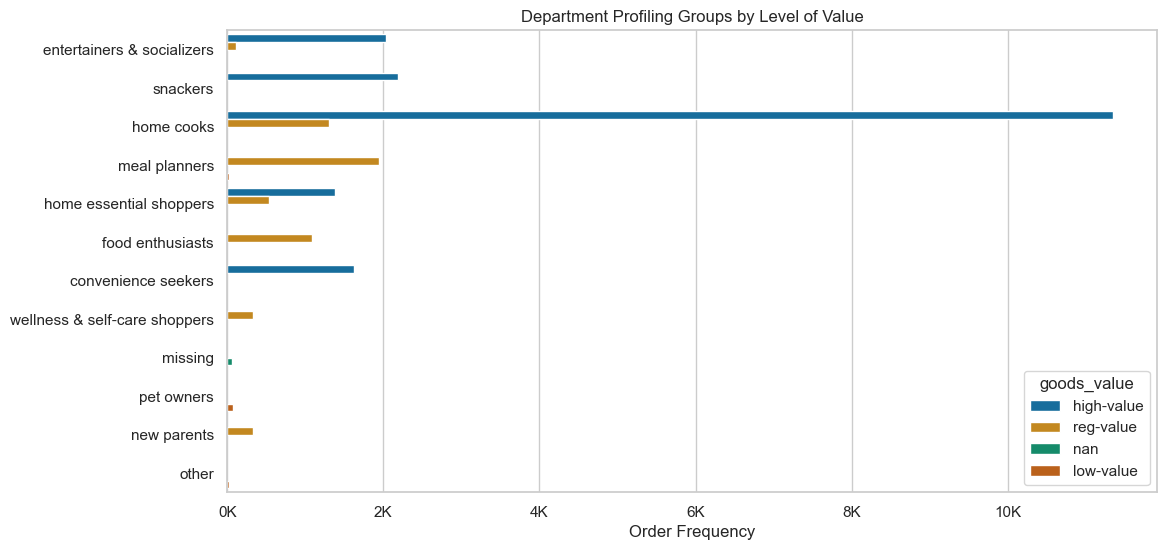

In [37]:
# Create a horizontal countplot of department goods profiling by level of value from all customer profiles

# Set style and fig size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Side-by-side countplot
count = sns.countplot(y='goods_prof', hue='goods_value', data=cust_pro_df, palette='colorblind')

# Add titles and labels
plt.xlabel('Order Frequency')
plt.ylabel('')
plt.title('Department Profiling Groups by Level of Value')

# Format y-axis labels in millions
count.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1e6)))

# Save the chart as a .png file
count.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_prof_value_bar.png'), bbox_inches='tight')

# Show the plot
plt.show()

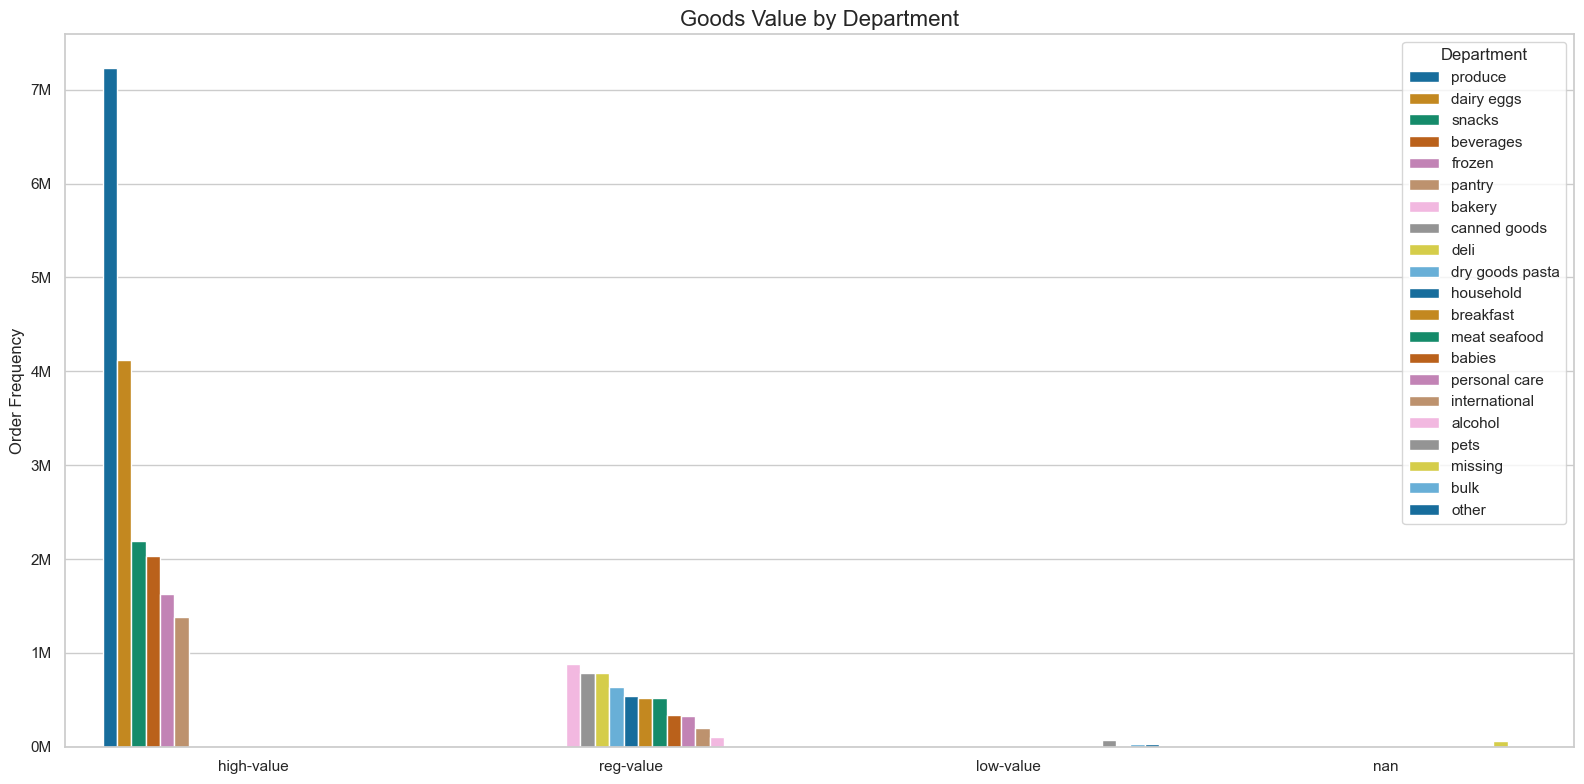

In [38]:
# Create a stacked barplot for 'goods_value' by region', and 'department'


# Get the order of goods_value by count
goods_value = cust_pro_df['goods_value'].value_counts().index

# Get the order of departments by count
department_order_1 = cust_pro_df['department'].value_counts().index

# Set fig size
plt.figure(figsize=(16, 8))

# Stacked bar chart for counts
count2 = sns.countplot(x='goods_value', hue='department', data=cust_pro_df, palette='colorblind', dodge=True, order=goods_value, hue_order=department_order_1)

plt.title('Goods Value by Department', fontsize=16)
plt.xlabel('')
plt.ylabel('Order Frequency')

# Add a legend for 'department'
plt.legend(title='Department', title_fontsize='12')

# Format y-axis labels in millions
count2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Save the chart as an image file
count2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_value_stacked_by_department.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

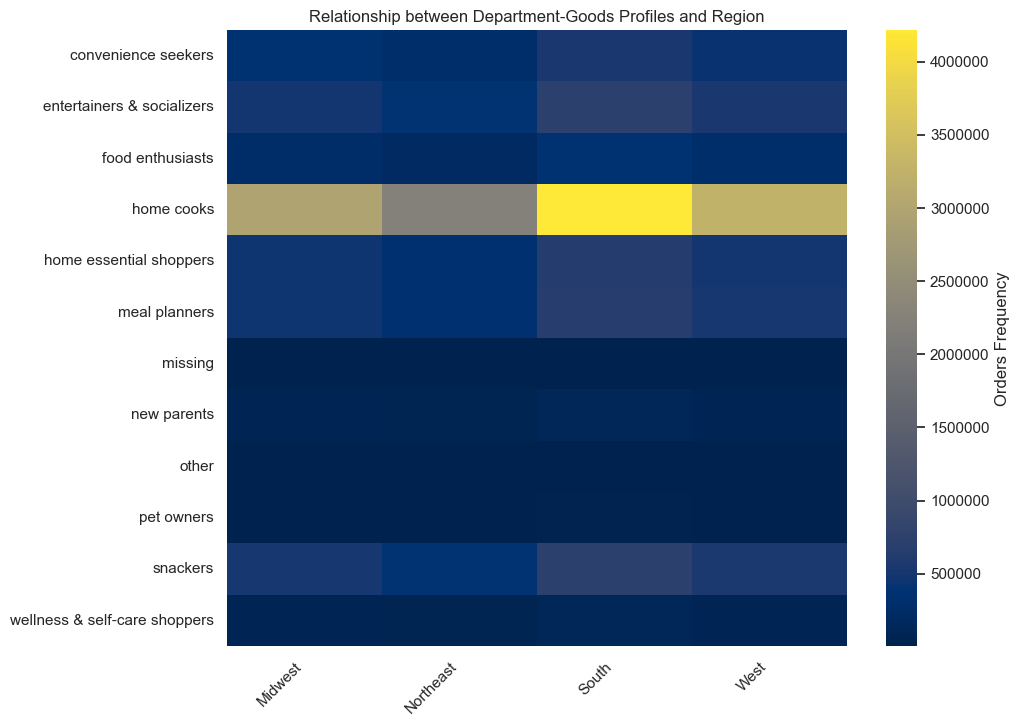

In [39]:
# Create a heatmap showing the relationship between department goods (goods_prof) profiling by region


# Create a pivot table for the heatmap
heatmap_data = cust_pro_df.groupby(['goods_prof', 'region']).size().unstack()

# Use colorblind-accessible colormap (e.g., "cividis")
custom_cmap = 'cividis'

# Create the heatmap using the custom colormap
plt.figure(figsize=(10, 8))
heat4 = sns.heatmap(heatmap_data, cmap=custom_cmap, annot=False, cbar_kws={'label': 'Orders Frequency', 'format': '%d'})

# Rotate x-axis category labels for better readability
plt.xticks(rotation=45, ha='right')

# Set axis labels and plot title
plt.xlabel('')
plt.ylabel('')
plt.title('Relationship between Department-Goods Profiles and Region')

# Save the chart as an image file
heat4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_dep_goods_prof_byregion.png'), bbox_inches='tight')

# Show the plot
plt.show()

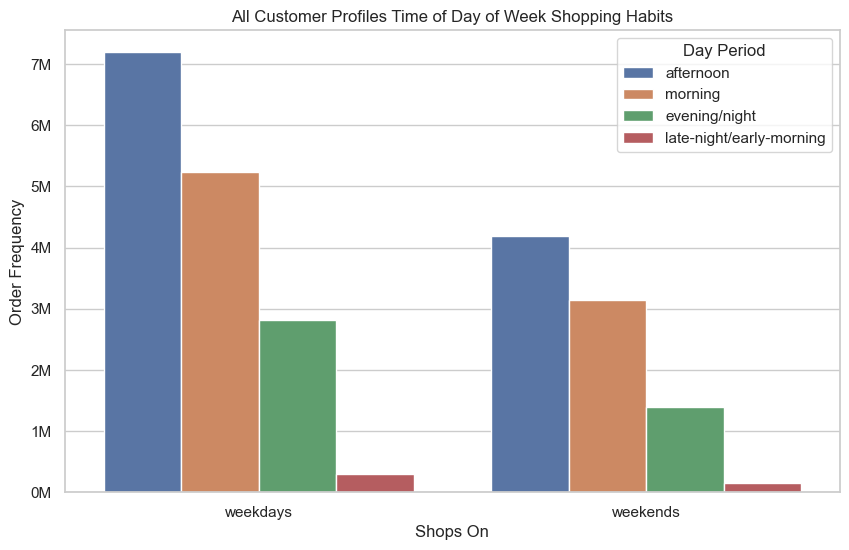

In [40]:
# Create line chart for shopping days of week by region


# Set the style of the plot
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
count3 = sns.countplot(x='shops_on', hue='day_period', data=cust_pro_df)

# Set plot labels and title
plt.xlabel('Shops On')
plt.ylabel('Order Frequency')
plt.title('All Customer Profiles Time of Day of Week Shopping Habits')

#Show the legend
plt.legend(title='Day Period')

# Format y-axis labels in millions
count3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

# Save the chart as an image file
count3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'countplot_shops_on_day_period.png'), bbox_inches='tight')

# Show the plot
plt.show()